In [1]:
import numpy as np   # for numerial analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN, KMeans,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

LEVEL 1 Analysis 
-------------------------
Identify if the type data in each column is categorical or numerical?
1. Separate out the categorical columns from the numerical types

### These are the kind of analyses that can be performed on categorical data
1. Check if it is Nominal or Ordinal 
2. Check how many categories are present
3. Check the Mode 
4. Check for Missing values 
5. Think about how the missing values could be treated
6. Think about the kind of graph/chart that can be plotted using this data

Note: We are analyzing only one column at a time (Univariate Analysis).

## Separating Categorical and Numerical Variables

In [8]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:               
        if df[column].nunique() < 50:     # returns no of unique values in column  
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  ----------------------
Gender         CustomerID
               Age
               Annual Income (k$)
               Spending Score (1-100)


# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

## Level 1 Analysis (Univariate Analysis)

In [9]:
print("Unique values in 'Gender' are: ",df['Gender'].unique()) # unique: returns the unique values in the col
print('No of unique values gender are ',df['Gender'].nunique())
print("Mode of 'Gender' is",df['Gender'].mode()[0])  
print("Number of missing values in 'Gender' is",df['Gender'].isnull().sum()) # isnull().sum() counts the number of null in dataframe
      

Unique values in 'Gender' are:  ['Male' 'Female']
No of unique values gender are  2
Mode of 'Gender' is Female
Number of missing values in 'Gender' is 0


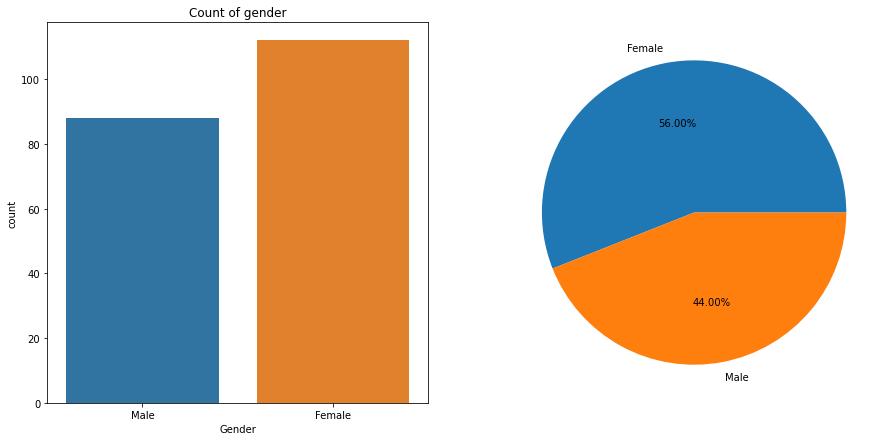

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of gender")                  
percentage = df['Gender'].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df['Gender'].value_counts().index)
    
sns.countplot(x = df['Gender'], ax = ax[0])
  
    
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   
plt.xticks(rotation=90)
plt.show()

## interpretation:
### there are more females about 56% and male are about 44%

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

LEVEL 1 Analysis of Numerical Columns
----------------------------------------------------------
Check if the data is discrete or continuous. \
Measure the central tendency (mean, median, mode) \
Measure the dispersion values \
Check for missing values \
Checking for skewness\
Check for outliers \
Think about how the missing values could be treated. \
Think about the kind of graph/chart that can be plotted using this data.

## User defined function for calculating mean, median, mode,  standard deviation, and count of all null values

In [11]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [89]:
def visual_of_num(col):
    fig, ax = plt.subplots(1, 2, figsize= (20, 7))            
    sns.histplot(x = df[col], ax =ax[1], color = "b") 
    sns.boxplot(x = df[col], ax = ax[0], color = "y") 
    ax[0].set_title(f'analysis of {col}')
    ax[1].set_title(f'analysis of {col}')
    plt.show()

In [90]:
continuous

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# analysis of age

In [91]:
info_of_numerical('Age')

The mean of the Age is 38.85
The median of the Age is 36.0
The mode of the Age is 32
The standard deviation of the Age is 13.969007331558883
Number of missing values in the Age is 0


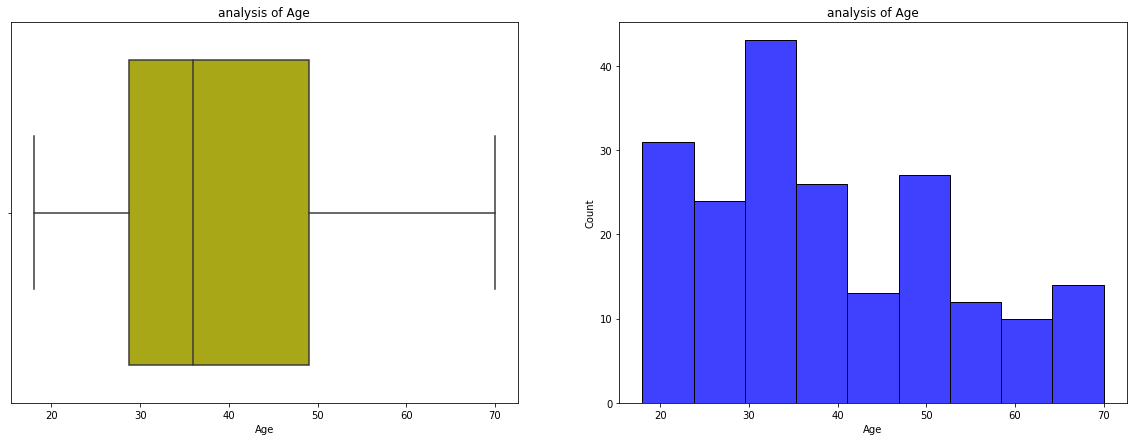

In [92]:
visual_of_num('Age')

## interpretation:
### age of majority of people are between 28 and 48 and median age is around 36

In [93]:
info_of_numerical('Annual Income (k$)')

The mean of the Annual Income (k$) is 60.56
The median of the Annual Income (k$) is 61.5
The mode of the Annual Income (k$) is 54
The standard deviation of the Annual Income (k$) is 26.264721165271254
Number of missing values in the Annual Income (k$) is 0


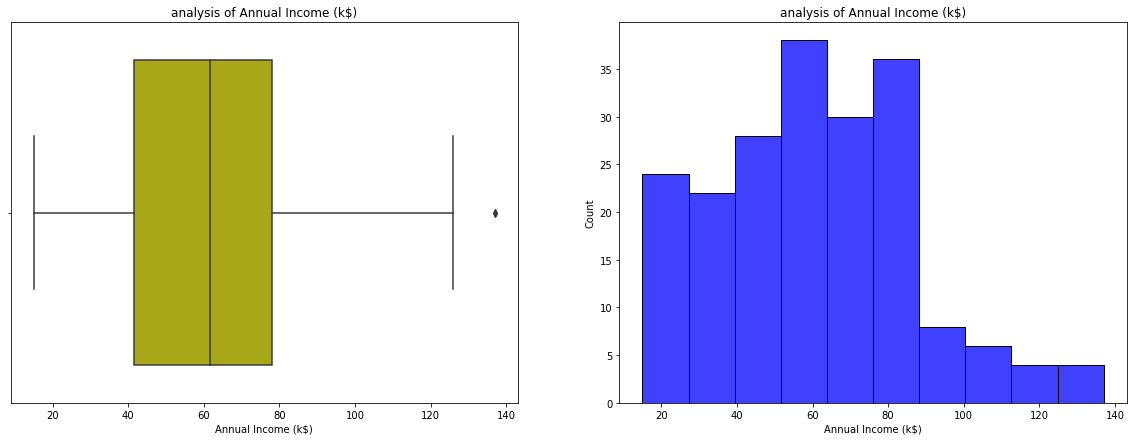

In [94]:
visual_of_num('Annual Income (k$)')

## interpretation:
### graph of income is right skewed and median income is around 61 k

In [95]:
info_of_numerical('Spending Score (1-100)')

The mean of the Spending Score (1-100) is 50.2
The median of the Spending Score (1-100) is 50.0
The mode of the Spending Score (1-100) is 42
The standard deviation of the Spending Score (1-100) is 25.823521668370162
Number of missing values in the Spending Score (1-100) is 0


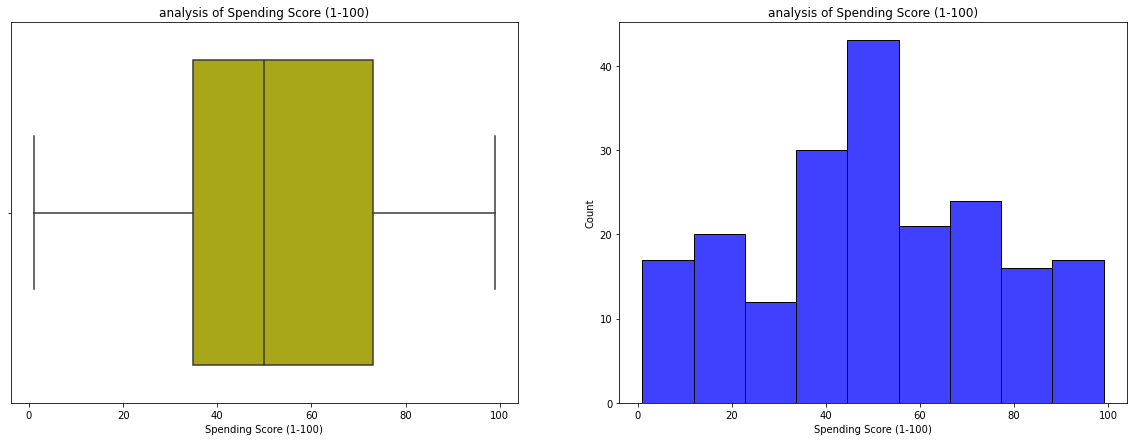

In [96]:
visual_of_num('Spending Score (1-100)')

## interpretation:
### median spending score is around 50 and majority of people have spending score between 35 and 74

# level 2 analysis

In [97]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  ----------------------
Gender         CustomerID
               Age
               Annual Income (k$)
               Spending Score (1-100)


## analysis of spending score with gender

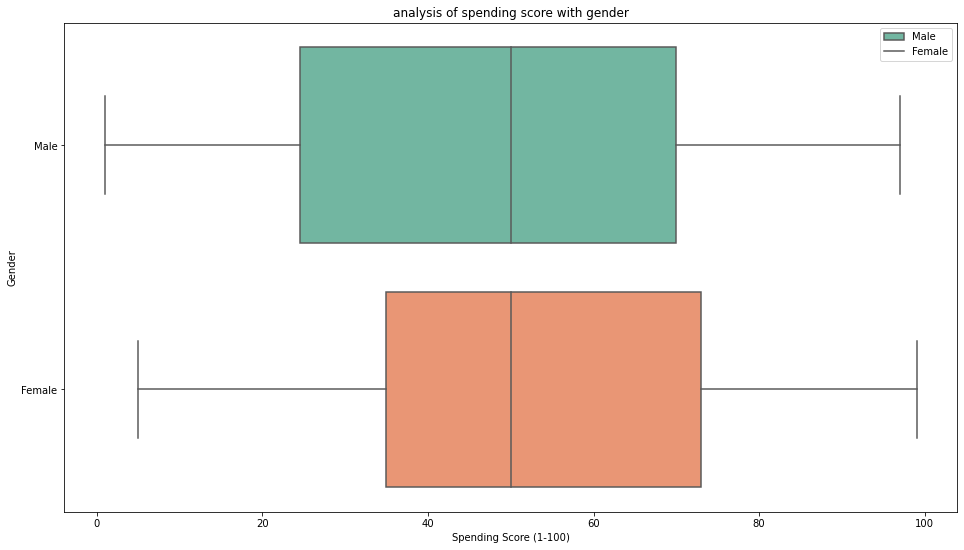

In [98]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot( x = "Spending Score (1-100)",y= 'Gender', data = df,palette='Set2')
plt.title('analysis of spending score with gender')
plt.legend(df['Gender'].unique())
plt.show()

## interpreatation:
### females have somewhat higher spending scores as compared to male

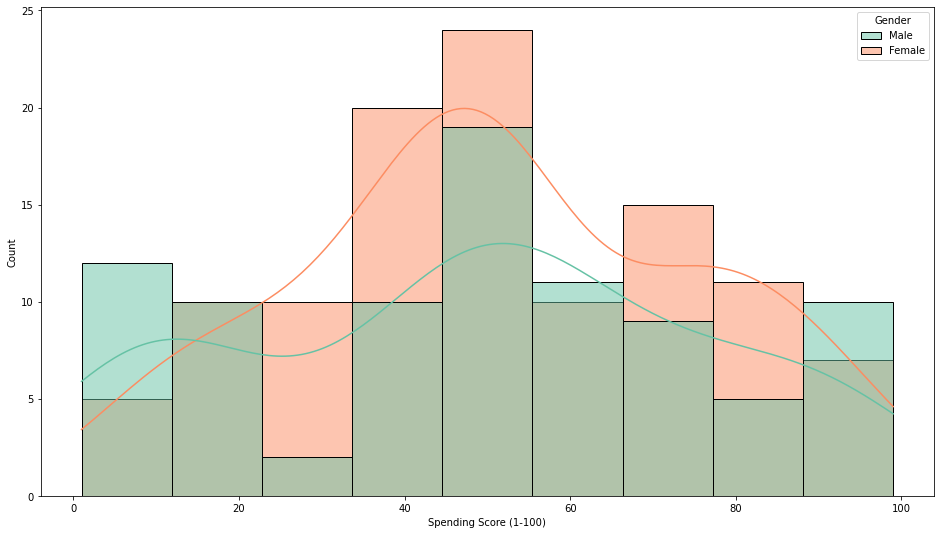

In [22]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.histplot( x = "Spending Score (1-100)",hue= 'Gender',kde=True, data = df,palette='Set2')
plt.show()

## analysis of spending score and age

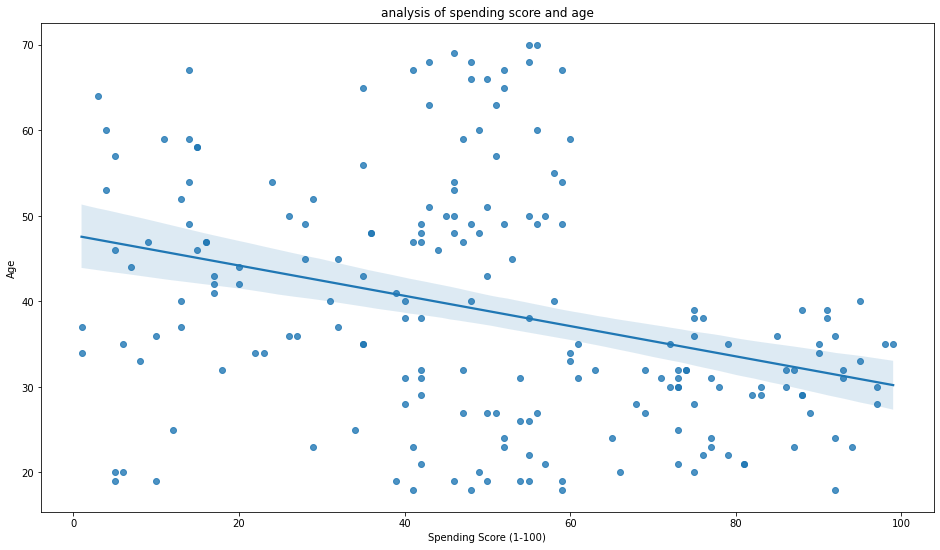

In [23]:
plt.figure(figsize=(16,9))
sns.regplot(x=df['Spending Score (1-100)'],y=df['Age'])
plt.title('analysis of spending score and age');

## interpretation:
### as age increases spending decreases

## analysis of age with income

correlation value: -0.01239804273606013


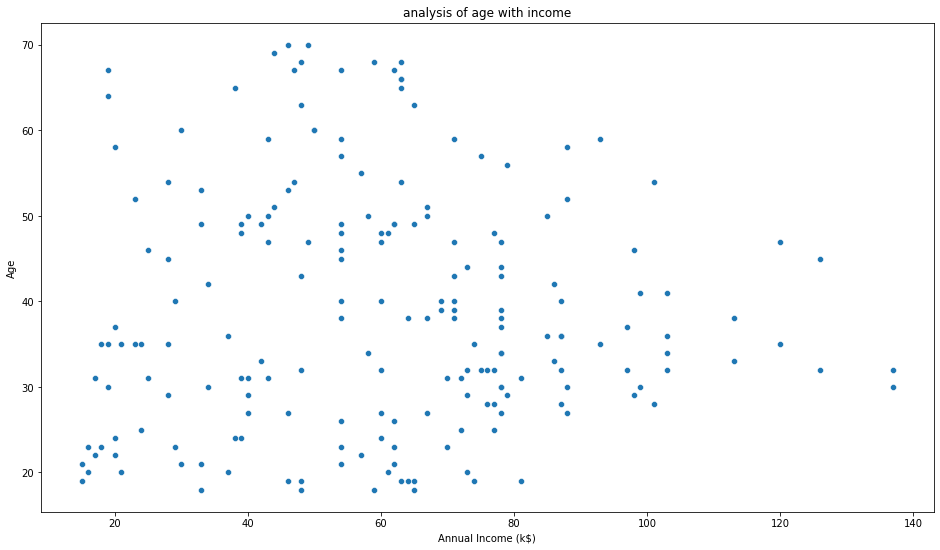

In [24]:
plt.figure(figsize=(16,9))
sns.scatterplot(y=df['Age'],x=df['Annual Income (k$)'])
print('correlation value:',df['Age'].corr(df['Annual Income (k$)']))
plt.title('analysis of age with income');

## interpretation:
###  as correlation value is -0.1 therefore there is not much relation between age and income

## analysis of gender with income

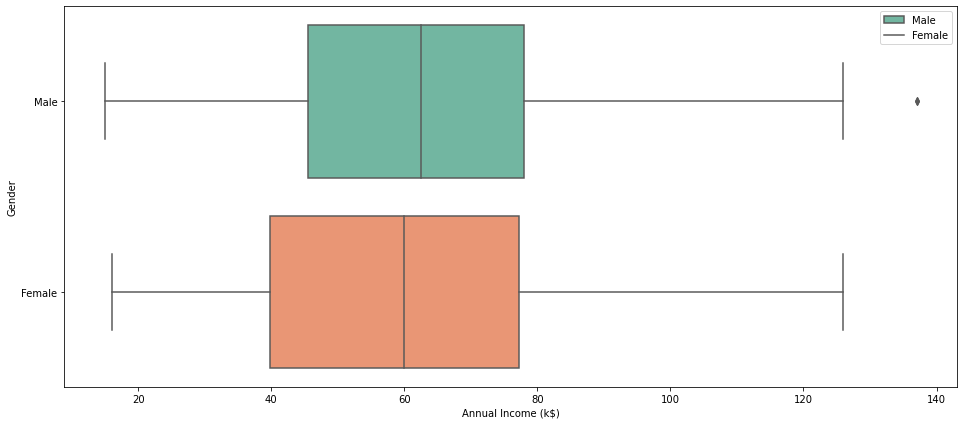

In [101]:
plt.figure(figsize=(16,7))
sns.boxplot(x=df['Annual Income (k$)'],y=df['Gender'],palette='Set2')

plt.legend(df['Gender'].unique());

## interpretation:
### income of females are somewhat less than those of males

## analysis of income with spending score

correlation value: 0.009902848094037605


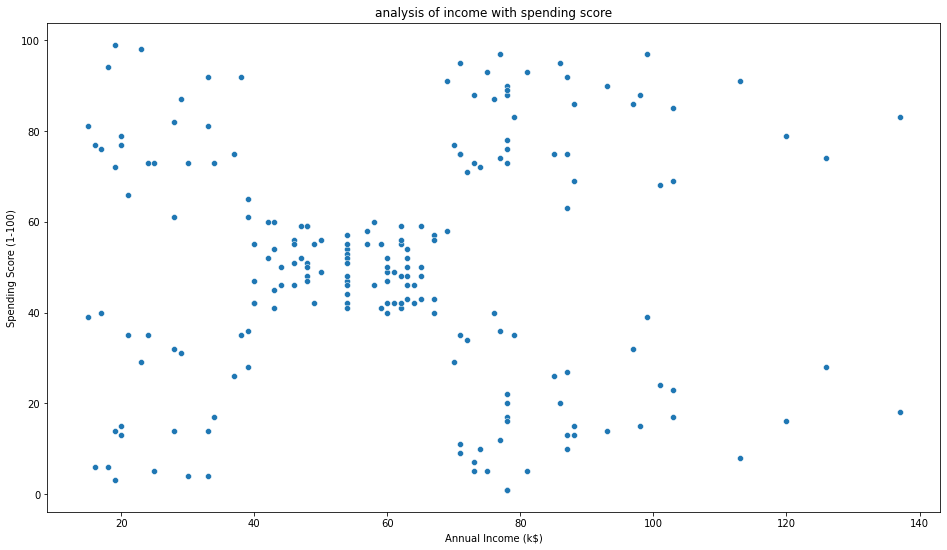

In [26]:
plt.figure(figsize=(16,9))
sns.scatterplot(y=df['Spending Score (1-100)'],x=df['Annual Income (k$)'])
plt.title('analysis of income with spending score')
print('correlation value:',df['Spending Score (1-100)'].corr(df['Annual Income (k$)']));

## interpretation
### as correlation value is near zero there is not much relationship between the two

## multivariate analysis

In [27]:
continuous

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

## analysis of spending score of male with age

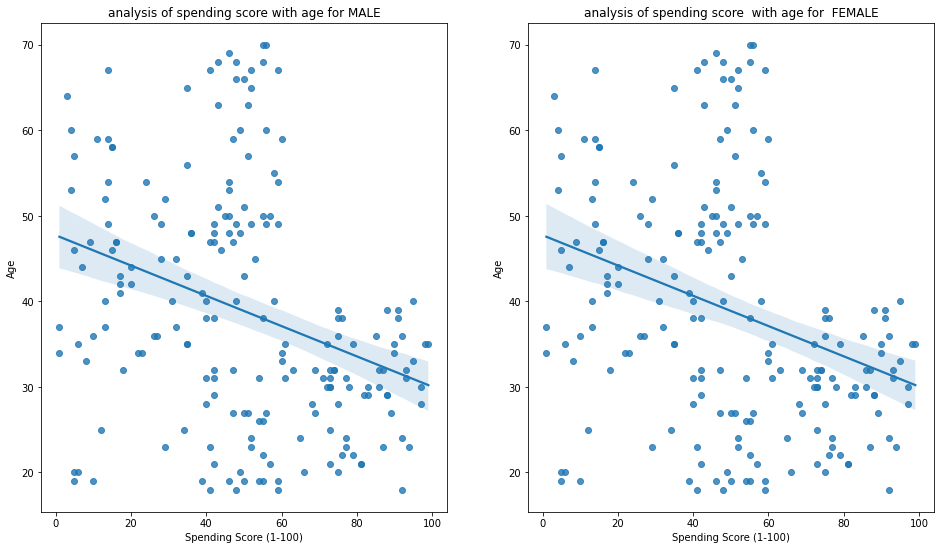

In [105]:
fig,ax=plt.subplots(1,2,figsize=(16,9))
sns.regplot(x=df['Spending Score (1-100)'],y=df['Age'],data=df[df['Gender']=='Male'],ax=ax[0])
ax[0].set_title('analysis of spending score with age for MALE')
sns.regplot(x=df['Spending Score (1-100)'],y=df['Age'],data=df[df['Gender']=='Female'],ax=ax[1])
ax[1].set_title('analysis of spending score  with age for  FEMALE');

## interpretation
### we can see spending score decreases with age both foe male and female

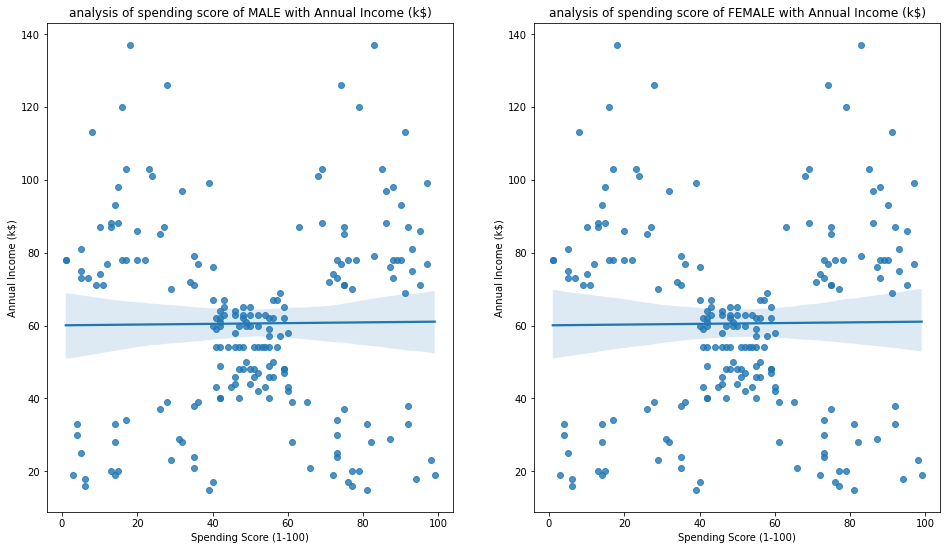

In [104]:
fig,ax=plt.subplots(1,2,figsize=(16,9))
sns.regplot(x=df['Spending Score (1-100)'],y=df['Annual Income (k$)'],data=df[df['Gender']=='Male'],ax=ax[0])
ax[0].set_title('analysis of spending score of MALE with income')
sns.regplot(x=df['Spending Score (1-100)'],y=df['Age'],data=df[df['Gender']=='Female'],ax=ax[1])
ax[1].set_title('analysis of spending score of FEMALE with ');

## feature engineering

In [29]:
df.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [30]:
data_c=df.copy()

data_c['Gender']=data_c['Gender'].astype('category')

## label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

data_c['Gender']=label.fit_transform(data_c['Gender'])

In [32]:
data_c.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

## dropping the customer id column as it has no effect on classification

In [33]:
data_c=data_c.drop('CustomerID',axis=1)
data_c

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## scaling the data

In [34]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x=ss.fit_transform(data_c)
ds=pd.DataFrame(x,columns=data_c.columns)


## feature extraction

## using PCA

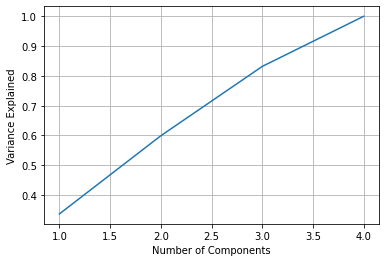

In [35]:
from sklearn.decomposition import PCA   ## using principal componenet analysis

v = []

for n in range(1,5):
    pca = PCA(n_components=n)
    pca.fit(x)
    
    v.append(sum(pca.explained_variance_ratio_))
    
plt.plot(range(1,5),v)
plt.grid()
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [36]:
pca = PCA(n_components=3)
pc = pca.fit_transform(x)

In [37]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.33690046, 0.26230645, 0.23260639])

In [38]:
dr=pd.DataFrame(pc)
dr

,0,1,2
0,-0.406383,-0.520714,-2.072527
1,-1.427673,-0.367310,-2.277644
2,0.050761,-1.894068,-0.367375
3,-1.694513,-1.631908,-0.717467
4,-0.313108,-1.810483,-0.426460
...,...,...,...
195,-1.179572,1.324568,1.932441
196,0.672751,1.221061,2.438084
197,-0.723719,2.765010,0.583178
198,0.767096,2.861930,1.150341


# k means model

## without dimension reduction

## elbow curve

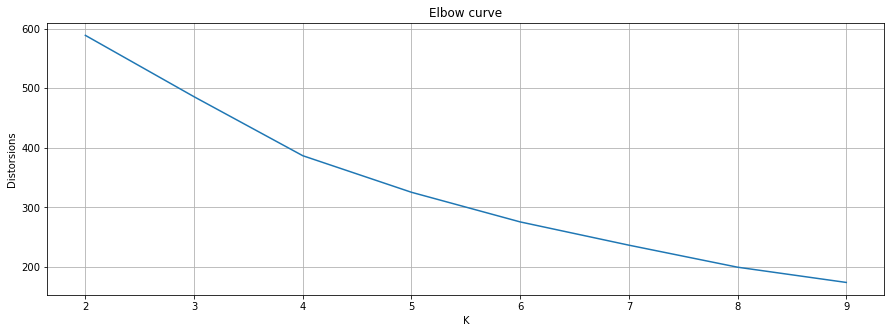

In [39]:
from sklearn.cluster import KMeans

dis = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    dis.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), dis)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

### taking the no of clusters as 4 as curve is bending sharply at 4

### creating the model

In [107]:
km=KMeans(n_clusters=4)
y_pred=km.fit_predict(x)

df['cluster']=y_pred

In [108]:
model=[]
score=[]

### silhoutte score

In [109]:
kmeans_wdr=round(silhouette_score(x,y_pred),3)
print('silhouette_score',round(silhouette_score(x,y_pred),3))

silhouette_score 0.299


In [110]:
model.append('kmeans_wdr')
score.append(kmeans_wdr)

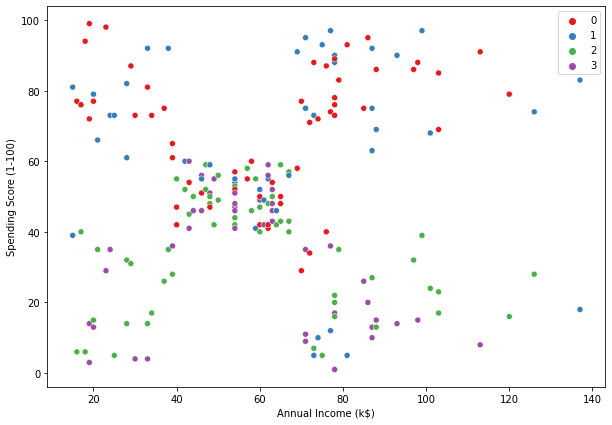

In [116]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=y_pred,palette='Set1');

## our classification is not much accurate as clusters are overlapping

## with dimension reduction

### elbow curve

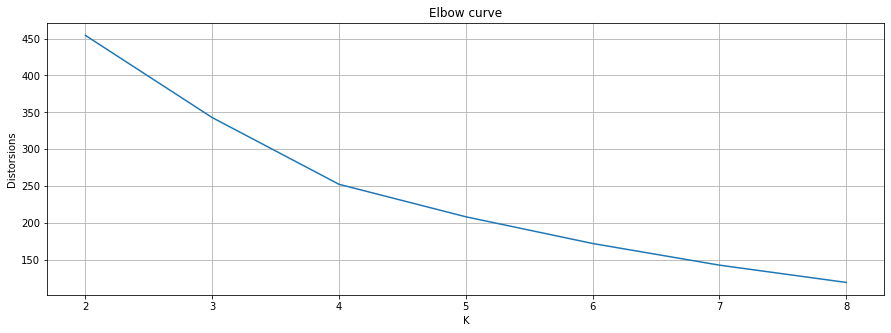

In [44]:
dis = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pc)
    dis.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 9), dis)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

### taking the no of clusters as 4 as curve is bending sharply at 4

## creating the model

In [117]:
km=KMeans(n_clusters=4)
y_pred=km.fit_predict(x)

df['cluster']=y_pred

### silhoutte score

In [118]:
kmeans_dr=round(silhouette_score(pc,y_pred),3)
print('silhouette_score',round(silhouette_score(pc,y_pred),3))

silhouette_score 0.395


In [119]:
model.append('kmeans_dr')
score.append(kmeans_dr)

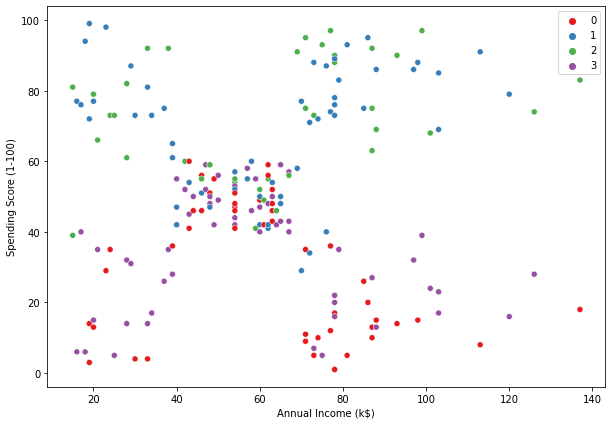

In [120]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=y_pred,palette='Set1');

## interpretation: our classification is not much accurate as clusters are overlapping

# agglomerative clustering

## without dimension reduction

## plotting the dendrogram

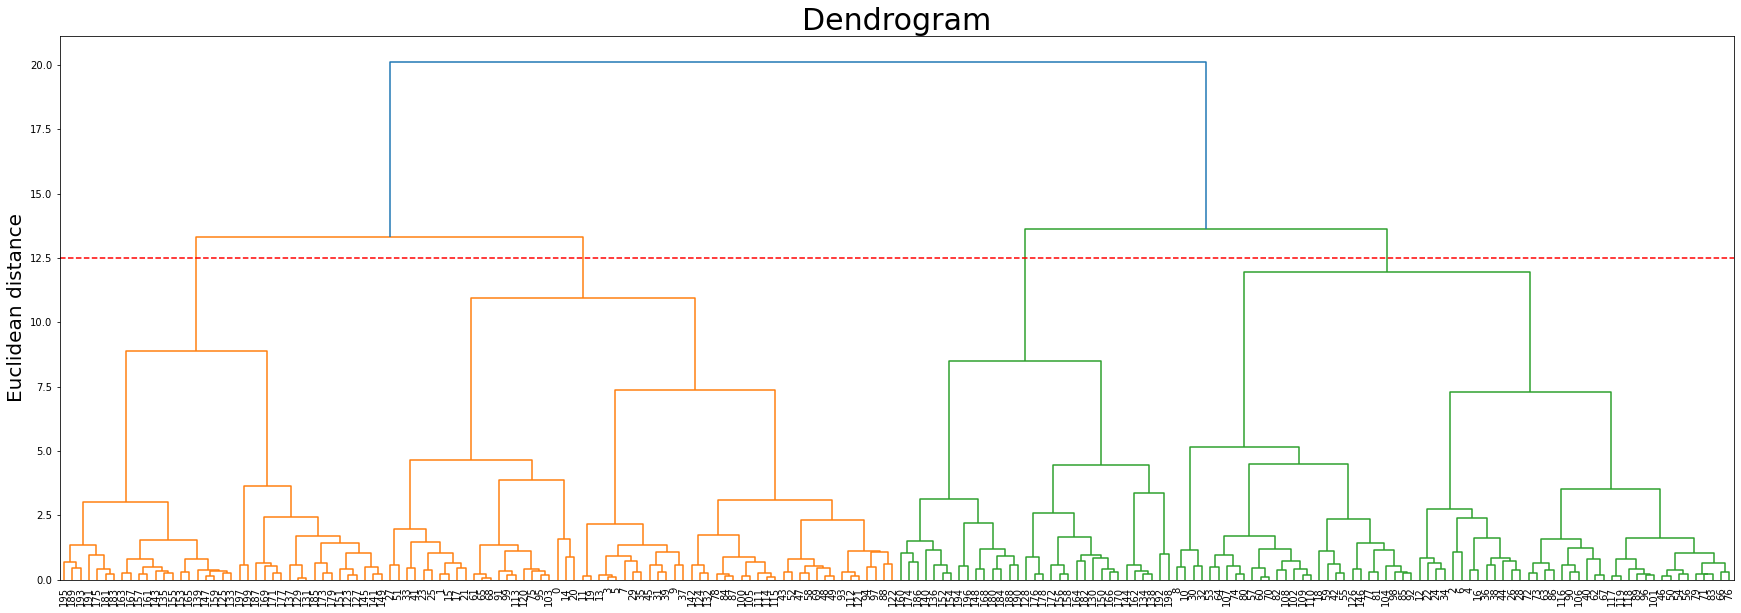

In [48]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(x, method = 'ward'),labels=data_c.index)
plt.axhline(y=12.5, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)

plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### taking no of clusters as 4


# creating the agglomerative clustering model

In [137]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

df['cluster']=y_hc

### silhoutte score

In [122]:
aggcluster_wdr=round(silhouette_score(x,y_hc),3)
print('silhouette_score',round(silhouette_score(x,y_hc),3))

silhouette_score 0.263


In [123]:
model.append('aggcluster_wdr')
score.append(aggcluster_wdr)

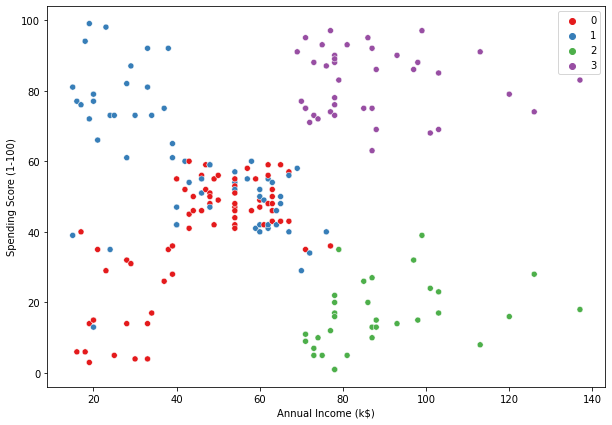

In [124]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=y_hc,palette='Set1');

## interpretation: our classification is somewhat good accurate as clusters are not overlapping that much

## with dimension reduction

## plotting the dendrogram

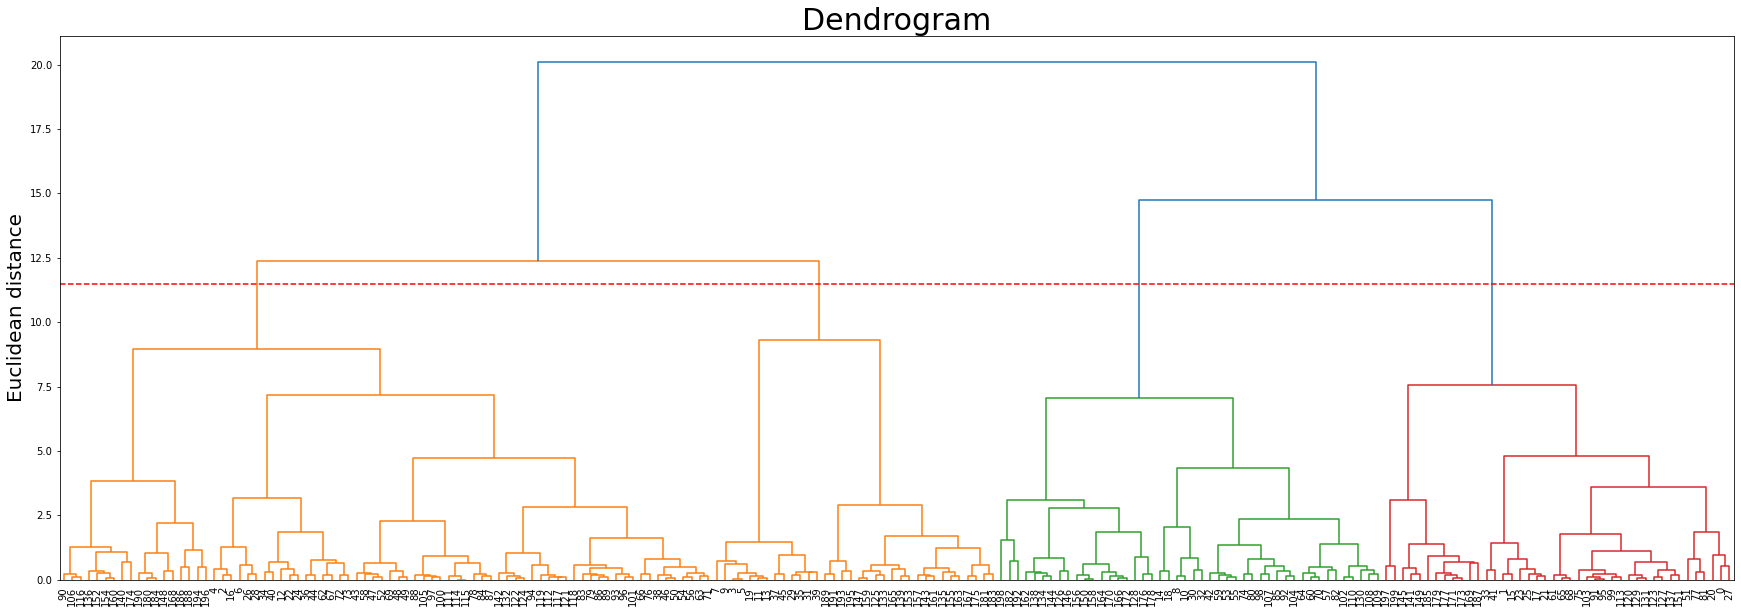

In [52]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(pc, method = 'ward'))
plt.axhline(y=11.5, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)

plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### taking no of clusters as 4

# creating the agglomerative clustering model

In [125]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(pc)

df['cluster']=y_hc

### silhoutte score

In [126]:
aggcluster_dr=round(silhouette_score(pc,y_hc),3)
print('silhouette_score',round(silhouette_score(pc,y_hc),3))

silhouette_score 0.352


In [127]:
model.append('aggcluster_dr')
score.append(aggcluster_dr)

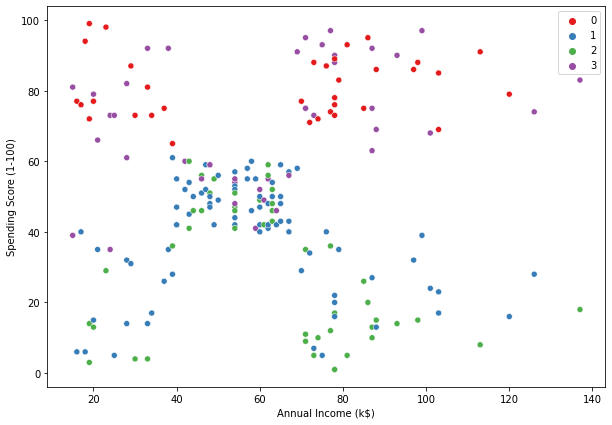

In [128]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=y_hc,palette='Set1');

## interpretation: our classification is not much accurate as clusters are overlapping

# dbscan

## without reduction

## plotting the k distance graph

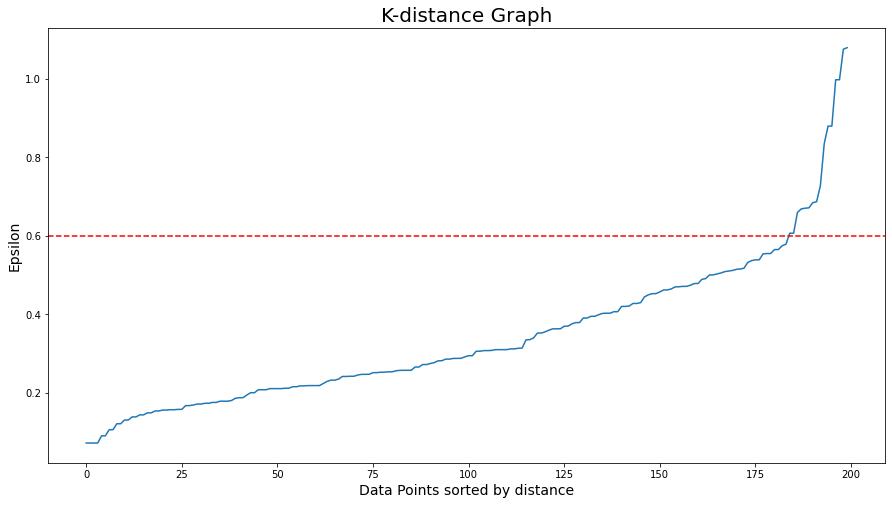

In [56]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.6, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

### taking epsilon value as 0.6
## now checking for optimum min_samples for clustering

In [57]:
eps=0.6
for min_samples in range(2,15):  ## checking the silhoutte scores for various min sample
        clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = clusterer.fit_predict(ds)
        c= cluster_labels +2  
        y = np.bincount(c)
        ii = np.nonzero(y)[0]
        results = list(zip(ii,y[ii]) )
        print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results),'| Silhouette score :',silhouette_score(ds,cluster_labels))
       

eps= 0.6 | min_samples=  2 | obtained clustering:  19 | Silhouette score : 0.23125670422002984
eps= 0.6 | min_samples=  3 | obtained clustering:  14 | Silhouette score : 0.21128255764776083
eps= 0.6 | min_samples=  4 | obtained clustering:  13 | Silhouette score : 0.1728206036462238
eps= 0.6 | min_samples=  5 | obtained clustering:  10 | Silhouette score : 0.09383923210660093
eps= 0.6 | min_samples=  6 | obtained clustering:  8 | Silhouette score : 0.13439846978061978
eps= 0.6 | min_samples=  7 | obtained clustering:  9 | Silhouette score : 0.07422790265515827
eps= 0.6 | min_samples=  8 | obtained clustering:  8 | Silhouette score : 0.024715132744260074
eps= 0.6 | min_samples=  9 | obtained clustering:  5 | Silhouette score : -0.018891339236761496
eps= 0.6 | min_samples=  10 | obtained clustering:  4 | Silhouette score : -0.0169827824912363
eps= 0.6 | min_samples=  11 | obtained clustering:  4 | Silhouette score : -0.07629812576339974
eps= 0.6 | min_samples=  12 | obtained clustering: 

## choosing value of min samples = 2  as silhoutte score is max for it

In [129]:
db_o=DBSCAN(eps=0.6,min_samples=2)  ## creating the instance of dbscan model
db_o.fit(ds)
y_db=db_o.labels_
df['cluster']=y_db

### silhoutte score

In [130]:
dbscan_wdr=round(silhouette_score(x,y_db),3)
print('silhouette_score',round(silhouette_score(x,y_db),3))

silhouette_score 0.231


In [131]:
model.append('dbscan_wdr')
score.append(dbscan_wdr)

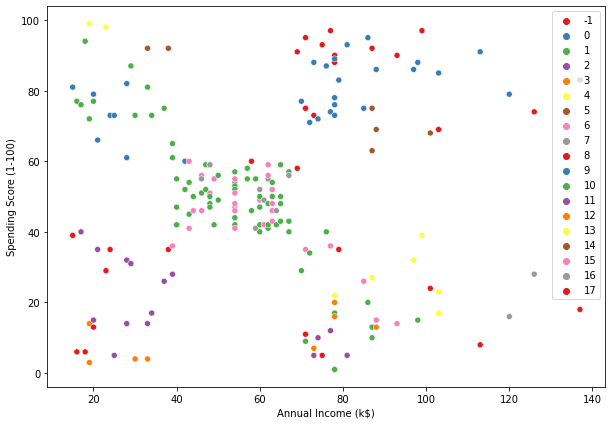

In [132]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=y_db,palette='Set1');

## interpretation: our classification is not much accurate as clusters are overlapping

## with reduction


## plotting the k distance graph

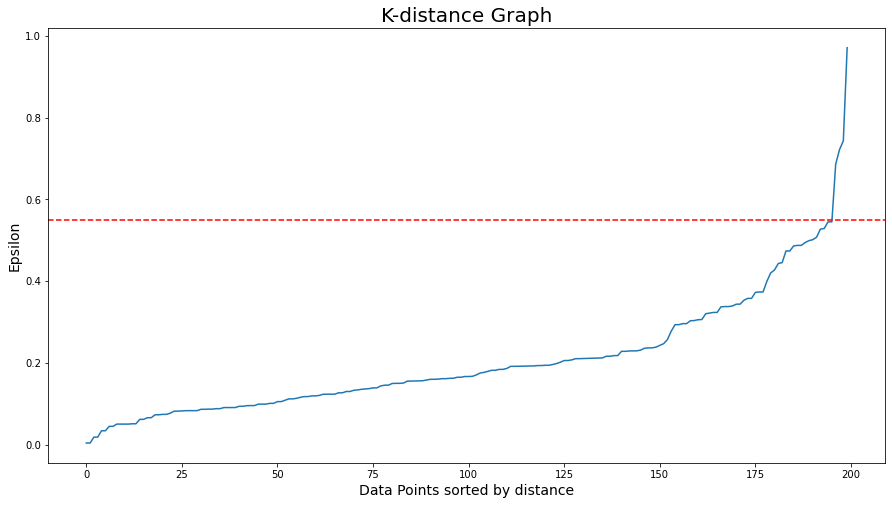

In [61]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(pc)
distances, indices = nbrs.kneighbors(pc)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.55, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

### taking epsilon value as 0.55
## now checking for optimum min_samples for clustering

In [62]:
eps=0.55
for min_samples in range(2,15):  # checking for various min sample values
        clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = clusterer.fit_predict(pc)
        c= cluster_labels +2  
        y = np.bincount(c)
        ii = np.nonzero(y)[0]
        results = list(zip(ii,y[ii]) )
        print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results),'| Silhouette score :',silhouette_score(pc,cluster_labels))
       

eps= 0.55 | min_samples=  2 | obtained clustering:  9 | Silhouette score : 0.1436942324512227
eps= 0.55 | min_samples=  3 | obtained clustering:  4 | Silhouette score : 0.3143573886110575
eps= 0.55 | min_samples=  4 | obtained clustering:  6 | Silhouette score : 0.2733189062281997
eps= 0.55 | min_samples=  5 | obtained clustering:  5 | Silhouette score : 0.27282438295257827
eps= 0.55 | min_samples=  6 | obtained clustering:  7 | Silhouette score : 0.20714945067286514
eps= 0.55 | min_samples=  7 | obtained clustering:  5 | Silhouette score : 0.243748072964335
eps= 0.55 | min_samples=  8 | obtained clustering:  5 | Silhouette score : 0.23841720349709683
eps= 0.55 | min_samples=  9 | obtained clustering:  5 | Silhouette score : 0.22559979746791037
eps= 0.55 | min_samples=  10 | obtained clustering:  5 | Silhouette score : 0.21610536181280493
eps= 0.55 | min_samples=  11 | obtained clustering:  5 | Silhouette score : 0.1556499287391567
eps= 0.55 | min_samples=  12 | obtained clustering:  4

## choosing value of min samples = 3  as silhoutte score is max for it

## creating the model

In [133]:
db_o=DBSCAN(eps=0.55,min_samples=3)  ## creating the instance of dbscan model
db_o.fit(pc)
y_db=db_o.labels_ 
df['cluster']=y_db

### silhoutte score

In [134]:
dbscan_dr=round(silhouette_score(pc,y_db),3)
print('silhouette_score',round(silhouette_score(pc,y_db),3))

silhouette_score 0.314


In [135]:
model.append('dbscan_dr')
score.append(dbscan_dr)

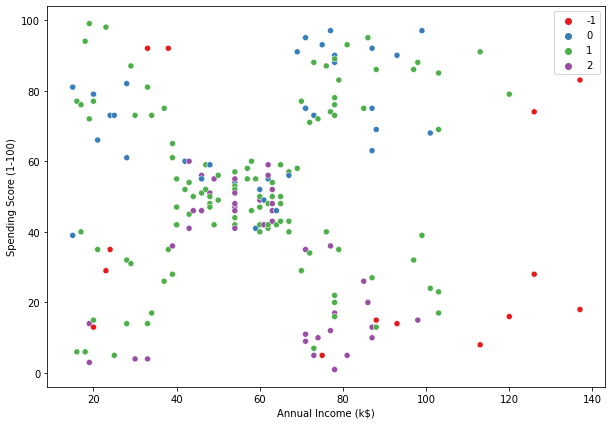

In [136]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=y_db,palette='Set1');

## interpretation: our classification is not much accurate as clusters are overlapping

## comparing silhoutte score of various models

In [66]:
per=pd.DataFrame({'model':model,'score':score})
per

,model,score
0,kmeans_wdr,0.302
1,kmeans_dr,0.394
2,aggcluster_wdr,0.263
3,aggcluster_dr,0.352
4,dbscan_wdr,0.231
5,dbscan_dr,0.314



## if we consider silhoutte score
### best model is kmeans clustering with dimension reduction as it has max silhoutte score of around 0.4

# visualisisng the clusters based on income and spending column

In [67]:
X = df.iloc[:, [3, 4]].values

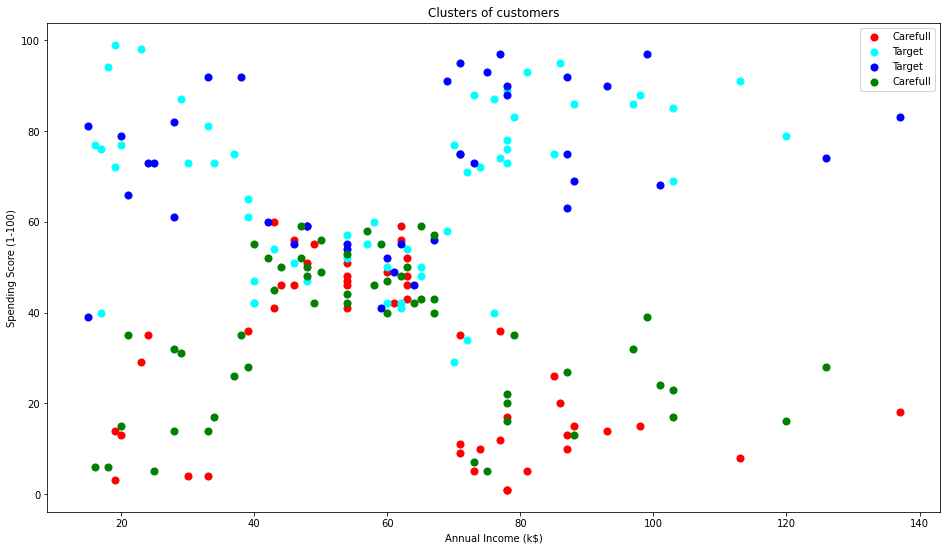

In [106]:
plt.figure(figsize=(16,9))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 50, c = 'red', label = 'Carefull')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 50, c = 'cyan', label = 'Target')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 50, c = 'blue', label = 'Target')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 50, c = 'green', label = 'Carefull')
#plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
#plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 50, c = 'black', label = 'Sens')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

## conclusion
### clusters 1 and 2 are our target customers as they spend more therefore our advertisements and offerings 
### would be foucussed on those 2 clusters

## if we consider cluster plot then agglomerative clustering without dimension reduction is best

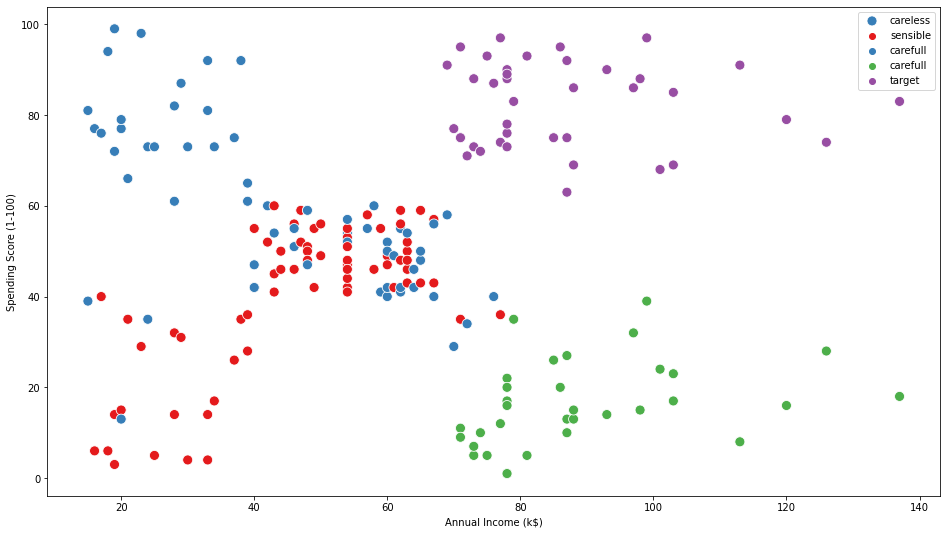

In [148]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=y_hc,palette='Set1',s=100)
plt.legend(labels=['careless','sensible','carefull','carefull','target']);

## conclusion
### we can adjust our offerings and ads for various groups accordingly
### target cluster is our high value customers as they spend more and have high income also
### therefore our advertisements and offerings would be more focussed on that clusters